-----------
## Initialization
We import all necessary modules and data. We also start a timer to keep track of overall execution time

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statistics import mean
import scipy.stats as stats
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from faker import Faker
import random

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [2]:
total_start = time.time()
df = pd.read_csv("noshow_data_v2 (1).csv")

----------------------
## Initial EDA
We perform basic EDA to learn the basic structure and contents of our dataset. We also visualize trends that may be present, to help us better preprocess our data.

In [3]:
#Exploratory Data Analysis
print("Head:")
display(df.head(10))
print("=========================")
print("Info:",df.info(),"=========================")
print("Description:")
display(df.describe())
print("=========================")
print("Null values\n", df.isnull().sum(),"\n=========================")
print("Dupicates:", df.duplicated().sum(),"\n=========================")

Head:


,Patient_Id,Gender,Scheduled_Date,Appointment_Date,Appointment_time,Age,Hipertension,Diabetes,Alcoholism,Handcap,...,Clinic_Location,Doctor_Id,Scheduled_Day,Appointment_Day,Appointment_Type,Channel,Cancelled,Rate_Of_Cancellation,Day_Difference,Appointment_Hour
0,299000.0,F,2016-04-29,2016-04-29,22:05:00,62,1,0,0,0,...,Noida,4000,Friday,Friday,Follow-up Visit,Call,1,0.666667,0 days,22
1,5590000.0,M,2016-04-29,2016-04-29,21:32:00,56,0,0,0,0,...,Pune,1000,Friday,Friday,New Patient,Web Portal,1,0.555556,0 days,21
2,42600.0,F,2016-04-29,2016-04-29,21:46:00,62,0,0,0,0,...,Coimbatore,1000,Friday,Friday,New Patient,Call,0,0.545455,0 days,21
3,8680.0,F,2016-04-29,2016-04-29,18:08:00,8,0,0,0,0,...,Pune,2000,Friday,Friday,Follow-up Visit,Web Portal,0,0.589744,0 days,18
4,88400.0,F,2016-04-29,2016-04-29,20:22:00,56,1,1,0,0,...,Pune,3000,Friday,Friday,New Patient,Mobile Application,1,0.535714,0 days,20
5,960000.0,F,2016-04-27,2016-04-29,12:39:00,76,1,0,0,0,...,Noida,5000,Wednesday,Friday,New Patient,Mobile Application,1,0.484848,2 days,12
6,7340000.0,F,2016-04-27,2016-04-29,17:30:00,23,0,0,0,0,...,Bengaluru,1000,Wednesday,Friday,Follow-up Visit,Web Portal,0,0.612903,2 days,17
7,34500.0,F,2016-04-27,2016-04-29,15:50:00,39,0,0,0,0,...,Chennai,4000,Wednesday,Friday,New Patient,Mobile Application,1,0.583333,2 days,15
8,564000.0,F,2016-04-29,2016-04-29,17:40:00,21,0,0,0,0,...,Bengaluru,5000,Friday,Friday,Follow-up Visit,Mobile Application,0,0.573770,0 days,17
9,781000.0,F,2016-04-27,2016-04-29,15:58:00,19,0,0,0,0,...,Pune,5000,Wednesday,Friday,New Patient,Web Portal,0,0.521739,2 days,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51173 entries, 0 to 51172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_Id            51173 non-null  float64
 1   Gender                51173 non-null  object 
 2   Scheduled_Date        51173 non-null  object 
 3   Appointment_Date      51173 non-null  object 
 4   Appointment_time      51173 non-null  object 
 5   Age                   51173 non-null  int64  
 6   Hipertension          51173 non-null  int64  
 7   Diabetes              51173 non-null  int64  
 8   Alcoholism            51173 non-null  int64  
 9   Handcap               51173 non-null  int64  
 10  Noshow                51173 non-null  object 
 11  Employment            51173 non-null  object 
 12  Location              51173 non-null  object 
 13  Clinic_Location       51173 non-null  object 
 14  Doctor_Id             51173 non-null  int64  
 15  Scheduled_Day      

,Patient_Id,Age,Hipertension,Diabetes,Alcoholism,Handcap,Doctor_Id,Cancelled,Rate_Of_Cancellation,Appointment_Hour
count,5.117300e+04,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000,51173.000000
mean,1.494935e+06,36.808317,0.202724,0.069255,0.035136,0.022707,3000.781662,0.603131,0.603500,16.626620
std,2.582909e+06,23.078810,0.402033,0.253890,0.184125,0.161435,1416.946716,0.489253,0.092290,3.867088
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,6.000000
25%,4.250000e+04,17.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,0.552632,14.000000
50%,3.180000e+05,37.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,1.000000,0.606061,17.000000
75%,9.480000e+05,55.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1.000000,0.655172,20.000000
max,1.000000e+07,98.000000,1.000000,1.000000,1.000000,3.000000,5000.000000,1.000000,1.000000,22.000000


Null values
 Patient_Id              0
Gender                  0
Scheduled_Date          0
Appointment_Date        0
Appointment_time        0
Age                     0
Hipertension            0
Diabetes                0
Alcoholism              0
Handcap                 0
Noshow                  0
Employment              0
Location                0
Clinic_Location         0
Doctor_Id               0
Scheduled_Day           0
Appointment_Day         0
Appointment_Type        0
Channel                 0
Cancelled               0
Rate_Of_Cancellation    0
Day_Difference          0
Appointment_Hour        0
dtype: int64 
Dupicates: 0 


From the above overview of the dataset, we can see that there are 23 columns and 51173 entries. Most columns are non-numerical, non ordinal and have no duplicates or null entries. Mean age is 36, 20% of patients have hypertension, 6% have diabetes, and 3% have alcoholism.

In [4]:
df.dropna(inplace=True)

df['Patient_Id'] = df['Patient_Id'].astype(int)

#converting to datetime format
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])
df['Appointment_time'] = pd.to_datetime(df['Appointment_time'], format='%H:%M:%S')

df['Day_Difference'] = (df['Appointment_Date'] - df['Scheduled_Date']).dt.days
df['Day_Difference'] = df['Day_Difference'].astype(int)

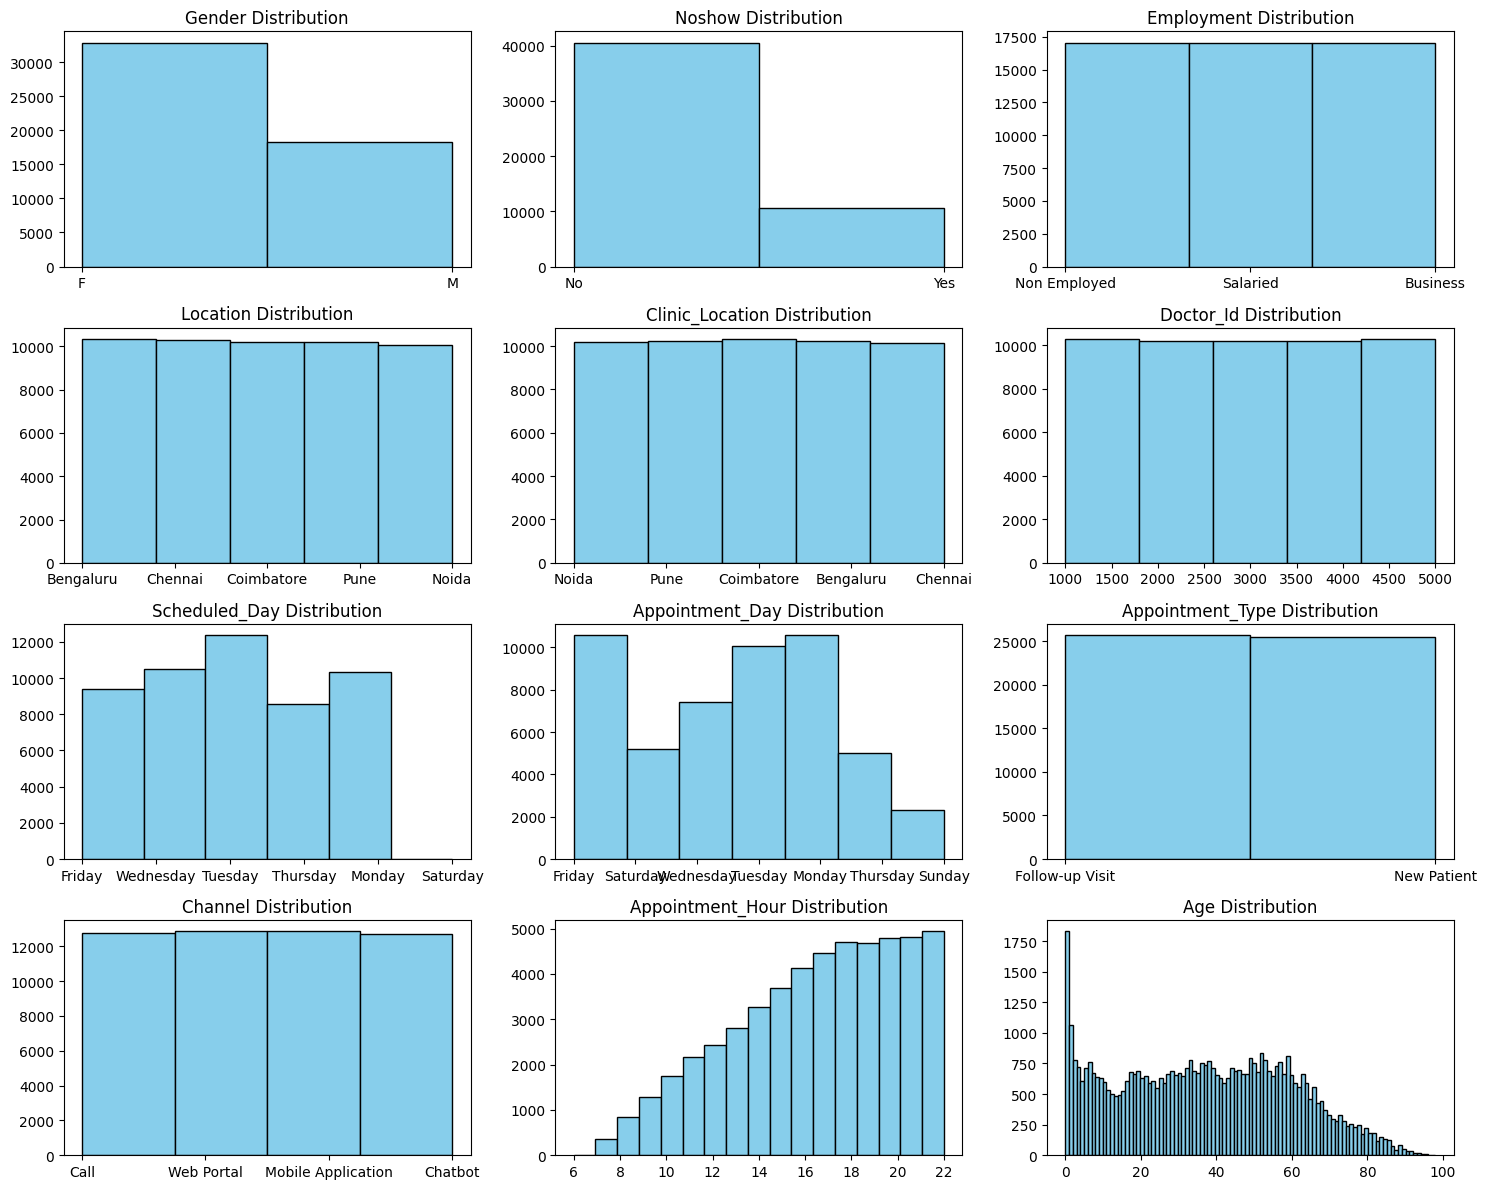

In [5]:
import matplotlib.pyplot as plt
import math

categorical_cols = ['Gender', 'Noshow', 'Employment', 'Location', 'Clinic_Location', 'Doctor_Id', 'Scheduled_Day', 'Appointment_Day', 'Appointment_Type', 'Channel']
numerical_cols = ['Patient_Id', 'Scheduled_Date','Appointment_Date', 'Appointment_time', 'Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Cancelled', 'Rate_Of_Cancellation', 'Day_Difference', 'Appointment_Hour']

# Create a list of columns for which you want to plot histograms
plot_columns = categorical_cols + ['Appointment_Hour', 'Age']

# Calculate the number of rows and columns for the grid
num_plots = len(plot_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, column in enumerate(plot_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]    
    ax.hist(df[column], bins=len(df[column].unique()), color='skyblue', edgecolor='black')
    
    ax.set_title(column + ' Distribution')
    
# Remove any empty subplots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust the layout
plt.tight_layout()
plt.show()

From the above, we can see that Gender is heavily skewed towards female, age has a massive spike in 0, Appointments tend to be higher into the night, there are far more 'no' entries in noshow (i.e. more people who showed up than not). Follow ups are just as much as new visits, There are more appointments on monday, tuesday and friday.

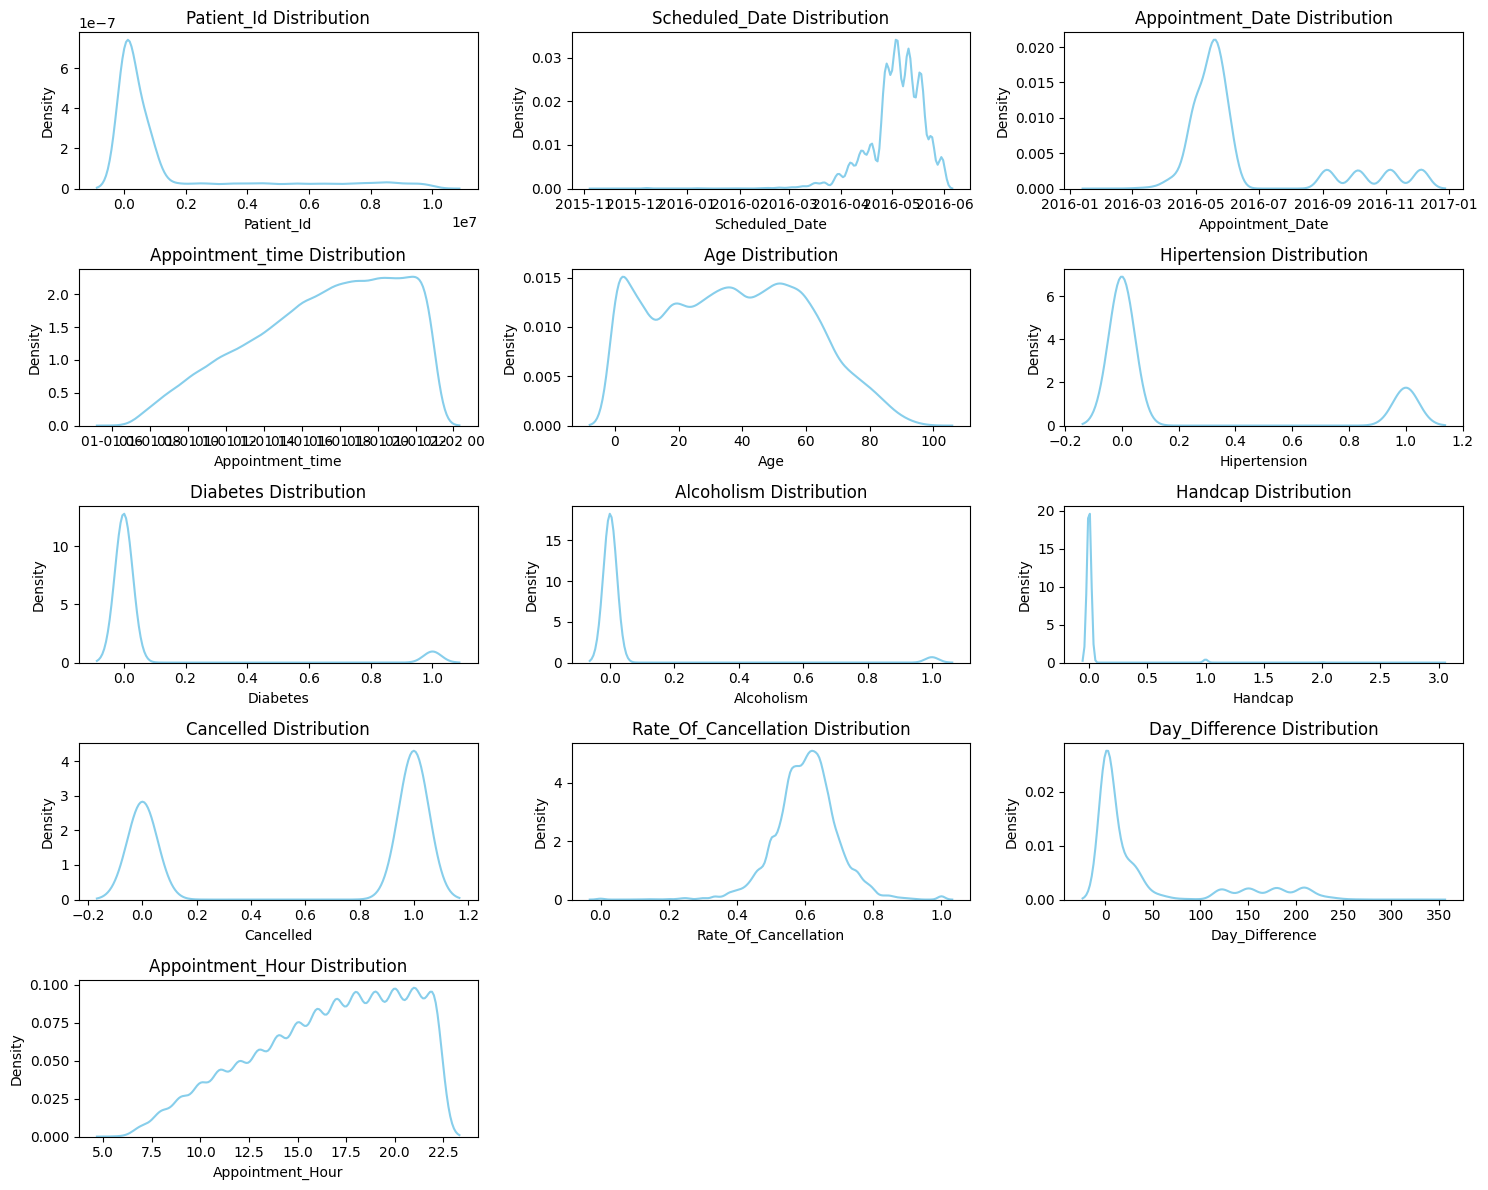

In [6]:
# Create a list of columns for which you want to plot KDE plots
plot_columns = numerical_cols

# Calculate the number of rows and columns for the grid
num_plots = len(plot_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, column in enumerate(plot_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Use Seaborn to create KDE plots
    sns.kdeplot(df[column], color='skyblue', ax=ax)
    
    ax.set_title(column + ' Distribution')
    
# Remove any empty subplots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust the layout
plt.tight_layout()
plt.show()

From the above, we can discern that most people tend to have a rate of cancellation around 0.6, There are more cancelled appointments than non cancelled ones, and most people have very little difference between their scheduled appointment and actual appointment dates. Very few of our patients have hypertension, and fewer have diabetes. There seems to be a massive spike in appointments at 2016-5, which falls by 2016-7

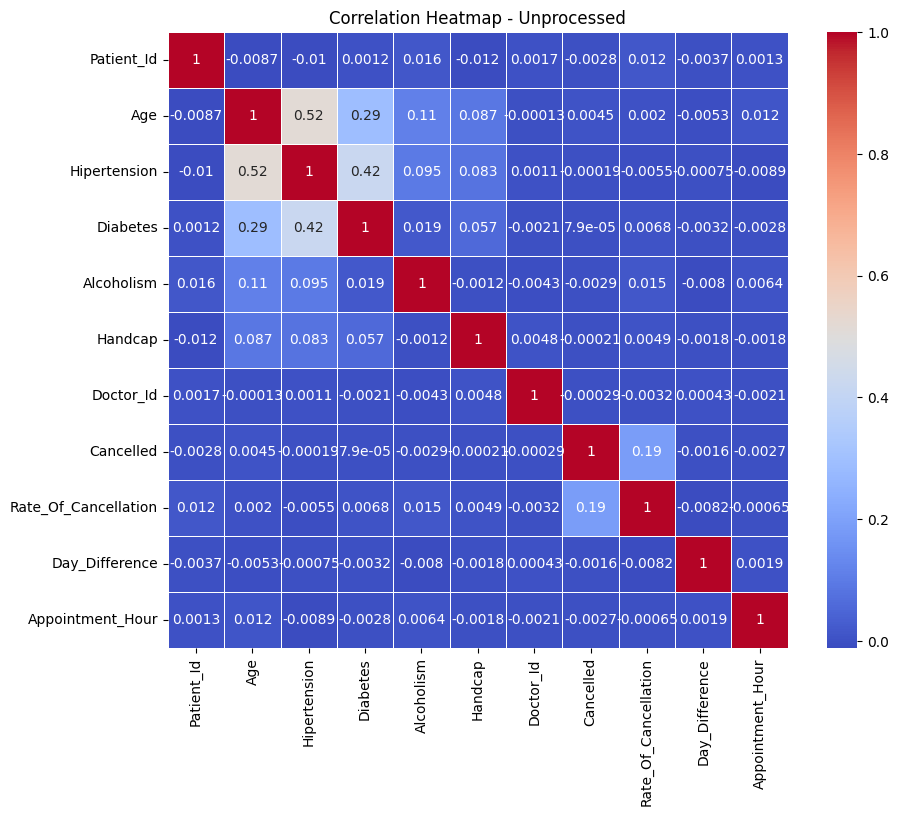

In [7]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Unprocessed')
plt.show()

The above heatmap shows us that Hypertension and age has a medium correlation of 0.52. Hypertension and diabetes has a relatively weaker correlation of 0.42, and diabetes is weakly correlated with age, at a 0.29 coefficient. There is a weak correlation between rate of cancellation and cancelled appointments, meaning people with higher cancellation rates mildly tend to cancel appointments more. The lack of all variables indicates the need to transform the categorical variables for further analysis

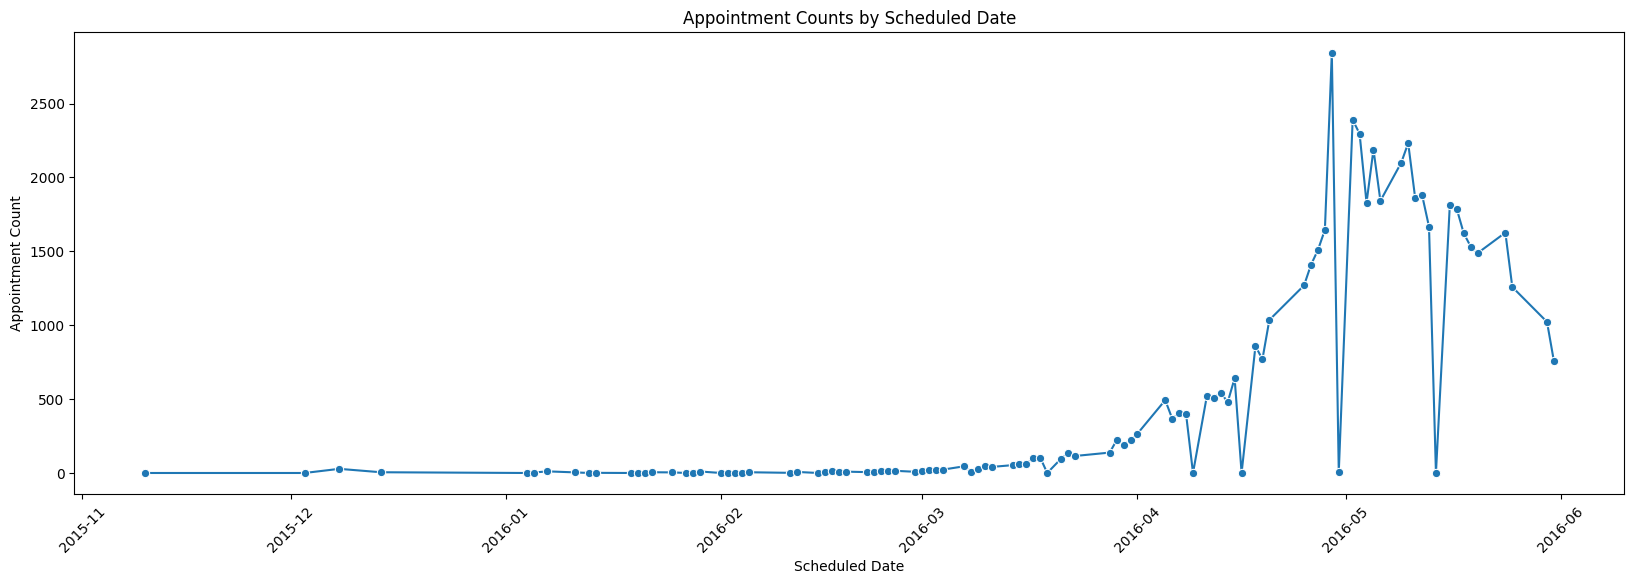

In [8]:
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])

appointment_counts_by_day = df['Scheduled_Date'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
sns.lineplot(data=appointment_counts_by_day, marker='o')
plt.xlabel('Scheduled Date')
plt.ylabel('Appointment Count')
plt.title('Appointment Counts by Scheduled Date')
plt.xticks(rotation=45)
plt.show()

Here we can notice a gradual increase in appointments as April 2016 begins, with some falls that rise quickly. Towards the end of april, the appointments scheduled see a massive surge to reach its peak, but suddenly falls by the time May 2016 approaches, only to pick right back up. This can be explained by a clinic-wide holiday on May 1st, May Day. The high rate of appointments continue till mid may, where a similar plummet happens. But as June approaches, rates fall to mid April levels.

----------------------------
## Preprocessing
We use our learnings of the dataset from above to process all the data to a trainable format. 

In [9]:
def preprocess(df):
    df.dropna(inplace=True)
    index_names = df[df['Age'] == 0].index
    df.drop(index_names, inplace=True)
    df['Patient_Id'] = df['Patient_Id'].astype(int)
    # Converting to datetime format
    df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
    df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])
    df['Appointment_time'] = pd.to_datetime(df['Appointment_time'], format='%H:%M:%S')

    df['Day_Difference'] = (df['Appointment_Date'] - df['Scheduled_Date']).dt.days
    df['Day_Difference'] = df['Day_Difference'].astype(int)
    
    # Feature extraction
    df['Scheduled_Year'] = df['Scheduled_Date'].dt.year
    df['Scheduled_Month'] = df['Scheduled_Date'].dt.month
    df['Scheduled_Day'] = df['Scheduled_Date'].dt.day
    #df['Scheduled_Date'] = df['Scheduled_Date'].apply(lambda x: x.timestamp())

    df['Appointment_Year'] = df['Appointment_Date'].dt.year
    df['Appointment_Month'] = df['Appointment_Date'].dt.month
    df['Appointment_Day'] = df['Appointment_Date'].dt.day
    #df['Appointment_Date'] = df['Appointment_Date'].apply(lambda x: x.timestamp())
    
    df['Appointment_Hour'] = df['Appointment_time'].dt.hour
    df['Appointment_Minute'] = df['Appointment_time'].dt.minute
    df['Combined_Time'] = df['Appointment_Hour'] + df['Appointment_Minute'] / 60

    """# Combine date and time components to create 'Appointment_time' without a memory error
    def combine_datetime(row):
        return pd.to_datetime(f"{int(row['Appointment_Year'])}-{int(row['Appointment_Month'])}-{int(row['Appointment_Day'])} {row['Appointment_time'].time()}")

    df['Appointment_time'] = df.apply(combine_datetime, axis=1)
    df['Appointment_time'] = df['Appointment_time'].apply(lambda x: x.timestamp())"""

    
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
    
    # Feature Encoding
    # Create an empty DataFrame to store the encoded values
    categorical_features = ['Gender', 'Noshow', 'Employment', 'Location', 'Clinic_Location', 'Doctor_Id', 'Scheduled_Day', 
                            'Appointment_Day', 'Appointment_Type', 'Channel', 'Age_Group']
    
    #Convert all int64 features to float64
    for col in df.columns[df.dtypes == np.int64]:
        df[col] = df[col].astype(np.float64)
    
    # Iterate through each categorical column and encode it
    encoder = OrdinalEncoder()
    encoded_df = encoder.fit_transform(df[categorical_features])
    encoded_df = pd.DataFrame(encoded_df, columns=categorical_features)

    df = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)
    
    # Drop duplicates and remaining null values
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True) 
    
    return df

df = preprocess(df)
#df.to_csv("noshow_data_v3.csv")

In [10]:
def select_most_correlated_features(df, target_column):
    correlation_matrix = df.corr()
    target_column_correlations = correlation_matrix[target_column]
    top_correlated_features = target_column_correlations.sort_values(ascending=False).index[:10]
    return list(top_correlated_features)

sole_correlated = select_most_correlated_features(df, 'Combined_Time')
print(sole_correlated)

['Combined_Time', 'Appointment_Hour', 'Appointment_Minute', 'Age', 'Clinic_Location', 'Location', 'Gender', 'Alcoholism', 'Day_Difference', 'Noshow']


C:\Users\anant\AppData\Local\Temp\ipykernel_4448\1782539529.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


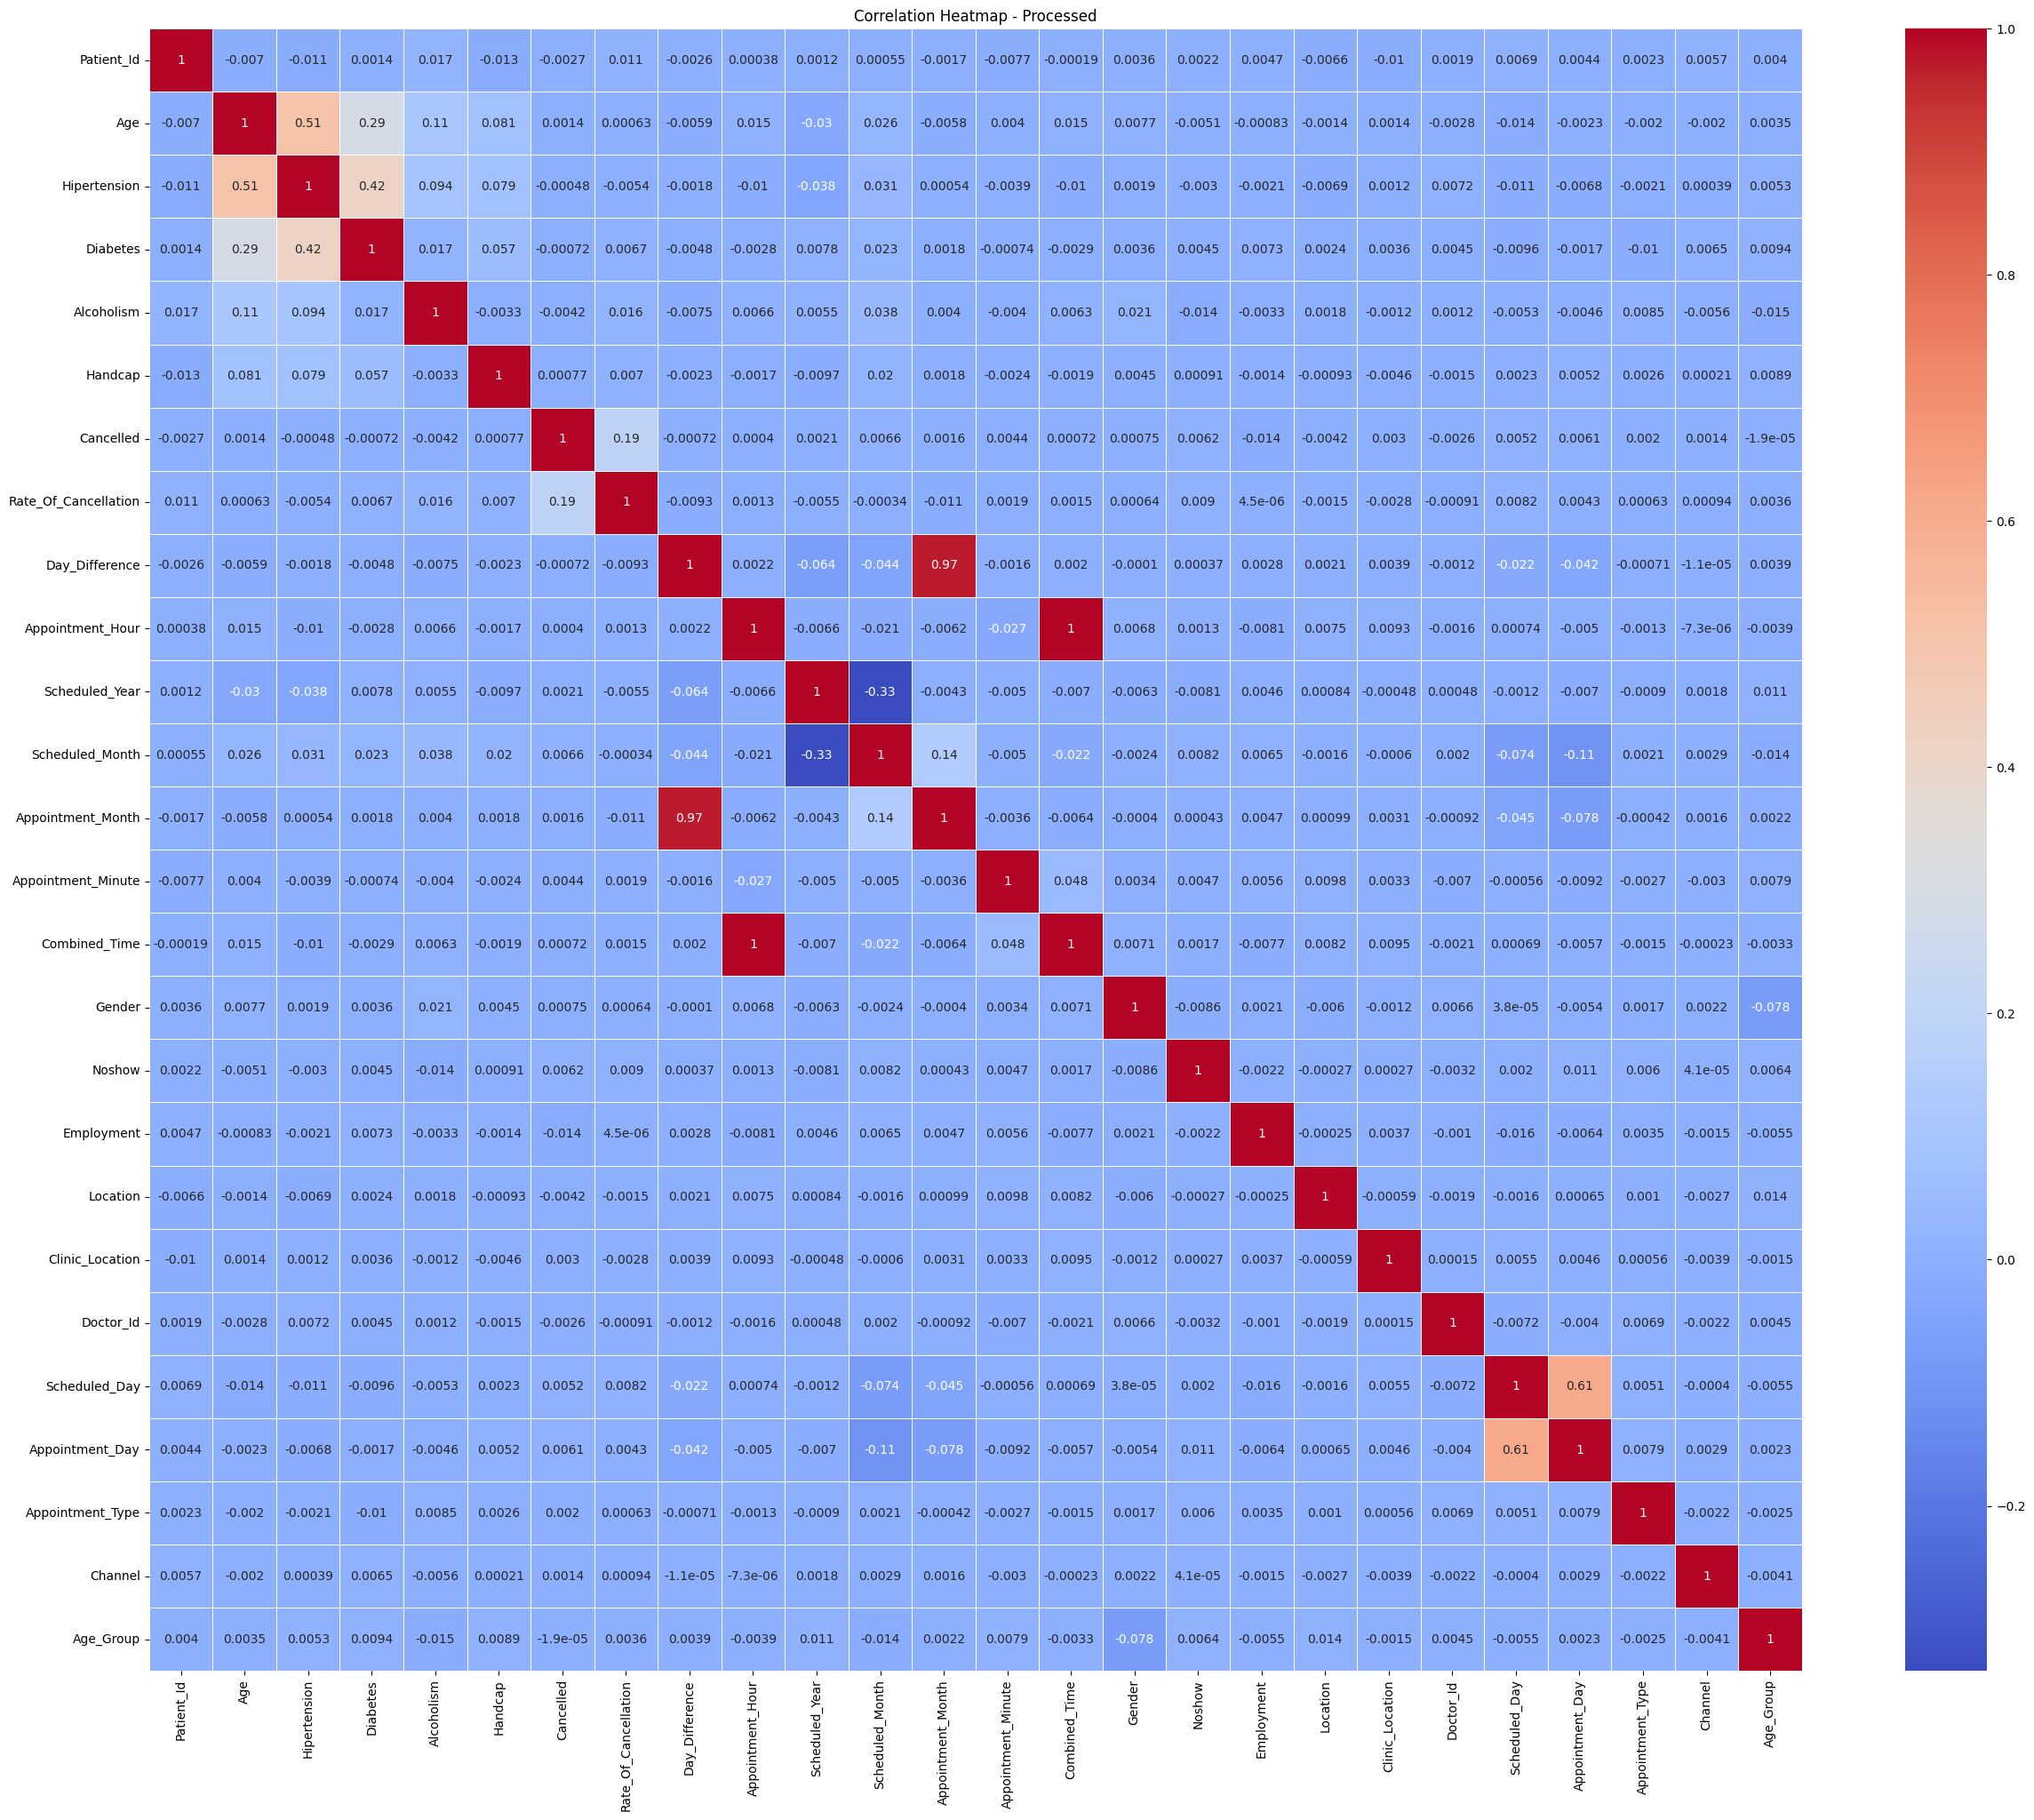

Most correlated features: {'Cancelled', 'Appointment_Month', 'Scheduled_Month', 'Day_Difference', 'Diabetes', 'Combined_Time', 'Scheduled_Day', 'Hipertension', 'Alcoholism', 'Scheduled_Year', 'Appointment_Day', 'Age', 'Appointment_Hour', 'Rate_Of_Cancellation'}


In [11]:
correlation_matrix = df.corr(numeric_only=True)
columns_to_remove = ["Appointment_Year"]
correlation_matrix.drop(columns=columns_to_remove, index=columns_to_remove, inplace=True)
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Processed')
plt.show()

# Set the correlation threshold
correlation_threshold = 0.1  # Adjust this threshold as needed

# Create a set to store the highly correlated features
highly_correlated_features = set()

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            # Add the feature names to the set
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)
            highly_correlated_features.add(feature_j)

# Print the highly correlated features
print("Most correlated features:", highly_correlated_features)

After converting the categorical features, we can see that `Scheduled_Day`, `Scheduled_Month`, `Rate_Of_Cancellation`, `Alcoholism`, `Cancelled`, `Scheduled_Year`, `Appointment_Day`, `Gender`, `Diabetes`, `Hipertension`, `Appointment_Month`, and `Day_Difference` are all the features that show correlation. Thus these are suitable features to select for training.

We created a column `Combined_Time`, to use for the prediction of the time in terms of hours

In [12]:
# Data Cleaning and Feature Selection
if 'Combined_Time' in highly_correlated_features:
    selected_features = list(highly_correlated_features)
else: selected_features = list(highly_correlated_features)+['Combined_Time']

# if 'Appointment_Hour' in highly_correlated_features: selected_features.remove('Appointment_Hour')

print(selected_features)

"""['Age', 'Gender', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
                     'Cancelled', 'Rate_Of_Cancellation', 'Noshow', 'Scheduled_Day', 
                     'Appointment_Day', 'Channel']"""

df = df[selected_features]
df.drop_duplicates(inplace=True)
df.dropna(inplace=True) 
# df.to_csv('noshow_data_v3.csv', index=False)

['Cancelled', 'Appointment_Month', 'Scheduled_Month', 'Day_Difference', 'Diabetes', 'Combined_Time', 'Scheduled_Day', 'Hipertension', 'Alcoholism', 'Scheduled_Year', 'Appointment_Day', 'Age', 'Appointment_Hour', 'Rate_Of_Cancellation']


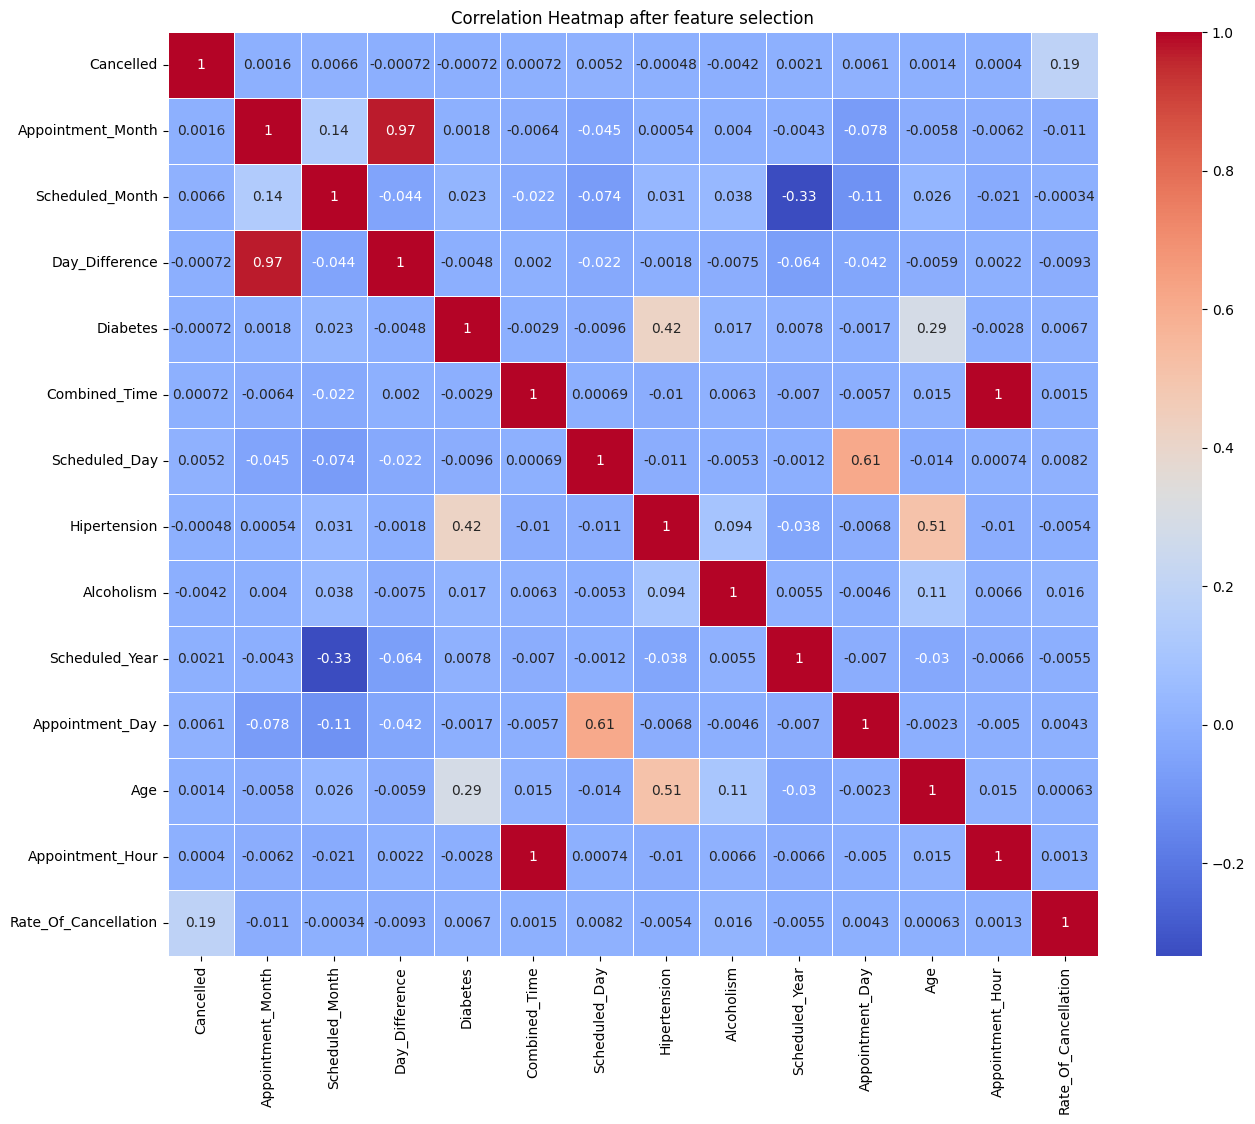

In [13]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap after feature selection')
plt.show()


--------------------------------
## Post Processing EDA
We re-examine our data to notice its current state, beforw it can be used in training.

In [14]:
#Post Processing Exploratory Data Analysis
print("Head:")
display(df.head(10))
print("=========================")
print("Info:",df.info(),"=========================")
print("Description:")
display(df.describe())
print("=========================")
print("Null values\n", df.isnull().sum(),"\n=========================")
print("Dupicates:", df.duplicated().sum(),"\n=========================")

Head:


,Cancelled,Appointment_Month,Scheduled_Month,Day_Difference,Diabetes,Combined_Time,Scheduled_Day,Hipertension,Alcoholism,Scheduled_Year,Appointment_Day,Age,Appointment_Hour,Rate_Of_Cancellation
0,1.0,4.0,4.0,0.0,0.0,22.083333,28.0,1.0,0.0,2016.0,28.0,62.0,22.0,0.666667
1,1.0,4.0,4.0,0.0,0.0,21.533333,28.0,0.0,0.0,2016.0,28.0,56.0,21.0,0.555556
2,0.0,4.0,4.0,0.0,0.0,21.766667,28.0,0.0,0.0,2016.0,28.0,62.0,21.0,0.545455
3,0.0,4.0,4.0,0.0,0.0,18.133333,28.0,0.0,0.0,2016.0,28.0,8.0,18.0,0.589744
4,1.0,4.0,4.0,0.0,1.0,20.366667,28.0,1.0,0.0,2016.0,28.0,56.0,20.0,0.535714
5,1.0,4.0,4.0,2.0,0.0,12.650000,26.0,1.0,0.0,2016.0,28.0,76.0,12.0,0.484848
6,0.0,4.0,4.0,2.0,0.0,17.500000,26.0,0.0,0.0,2016.0,28.0,23.0,17.0,0.612903
7,1.0,4.0,4.0,2.0,0.0,15.833333,26.0,0.0,0.0,2016.0,28.0,39.0,15.0,0.583333
8,0.0,4.0,4.0,0.0,0.0,17.666667,28.0,0.0,0.0,2016.0,28.0,21.0,17.0,0.573770
9,0.0,4.0,4.0,2.0,0.0,15.966667,26.0,0.0,0.0,2016.0,28.0,19.0,15.0,0.521739


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47544 entries, 0 to 49342
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelled             47544 non-null  float64
 1   Appointment_Month     47544 non-null  float64
 2   Scheduled_Month       47544 non-null  float64
 3   Day_Difference        47544 non-null  float64
 4   Diabetes              47544 non-null  float64
 5   Combined_Time         47544 non-null  float64
 6   Scheduled_Day         47544 non-null  float64
 7   Hipertension          47544 non-null  float64
 8   Alcoholism            47544 non-null  float64
 9   Scheduled_Year        47544 non-null  float64
 10  Appointment_Day       47544 non-null  float64
 11  Age                   47544 non-null  float64
 12  Appointment_Hour      47544 non-null  float64
 13  Rate_Of_Cancellation  47544 non-null  float64
dtypes: float64(14)
memory usage: 5.4 MB
Info: None =======================

,Cancelled,Appointment_Month,Scheduled_Month,Day_Difference,Diabetes,Combined_Time,Scheduled_Day,Hipertension,Alcoholism,Scheduled_Year,Appointment_Day,Age,Appointment_Hour,Rate_Of_Cancellation
count,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000,47544.000000
mean,0.604472,5.989589,4.616313,42.561438,0.072039,17.124903,14.536219,0.209595,0.037208,2015.999222,14.819199,38.161703,16.624979,0.603571
std,0.488969,2.364970,0.614741,68.423788,0.258554,3.873756,8.893471,0.407024,0.189272,0.027886,9.773787,22.295627,3.870779,0.092201
min,0.000000,2.000000,1.000000,0.000000,0.000000,6.516667,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,6.000000,0.000000
25%,0.000000,5.000000,4.000000,0.000000,0.000000,14.350000,8.000000,0.000000,0.000000,2016.000000,4.000000,20.000000,14.000000,0.552632
50%,1.000000,5.000000,5.000000,6.000000,0.000000,17.633333,15.000000,0.000000,0.000000,2016.000000,16.000000,38.000000,17.000000,0.606061
75%,1.000000,5.000000,5.000000,36.000000,0.000000,20.350000,23.000000,0.000000,0.000000,2016.000000,24.000000,56.000000,20.000000,0.655172
max,1.000000,12.000000,12.000000,333.000000,1.000000,22.983333,30.000000,1.000000,1.000000,2016.000000,30.000000,98.000000,22.000000,1.000000


Null values
 Cancelled               0
Appointment_Month       0
Scheduled_Month         0
Day_Difference          0
Diabetes                0
Combined_Time           0
Scheduled_Day           0
Hipertension            0
Alcoholism              0
Scheduled_Year          0
Appointment_Day         0
Age                     0
Appointment_Hour        0
Rate_Of_Cancellation    0
dtype: int64 
Dupicates: 0 


From reviewing the data after pre-processing, we can see that there are now 13 columns, meaning 10 columns have been removed by feature selection. There are 44940 entries, meaning 6233 entries have been dropped. All features are now float. 

--------------------------------------------
## Training, Testing and Validation
We train the data on various models, sampling techniques and assess their performances

In [15]:
X = df.drop('Combined_Time', axis=1)
y = df['Combined_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model_overall = None
best_model_name_overall = None
best_rmse_overall = float('inf')

"""print(X.columns)
print(X.info())"""

'print(X.columns)\nprint(X.info())'

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = [
    (LinearRegression(), 'Linear Regression'),
    (RandomForestRegressor(), 'Random Forest Regressor'),
    (XGBRegressor(), 'XGBoost Regressor'),
    (AdaBoostRegressor(), 'AdaBoost Regressor'),
    (GradientBoostingRegressor(), 'Gradient Boosting Regressor'),
    (DecisionTreeRegressor(), 'Decision Tree Regressor')
]

# Evaluate and print model performance
for model, model_name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R-squared: {r2:.2f}")

    if rmse < best_rmse_overall: 
        best_model_overall = model
        best_rmse_overall = rmse
        best_model_name_overall = model_name

print(f"\nThe best model is {best_model_name_overall} with RMSE: {best_rmse_overall:.2f}")


Linear Regression - MAE: 0.25, RMSE: 0.29, R-squared: 0.99
Random Forest Regressor - MAE: 0.26, RMSE: 0.30, R-squared: 0.99
XGBoost Regressor - MAE: 0.25, RMSE: 0.30, R-squared: 0.99
AdaBoost Regressor - MAE: 0.42, RMSE: 0.51, R-squared: 0.98
Gradient Boosting Regressor - MAE: 0.25, RMSE: 0.29, R-squared: 0.99
Decision Tree Regressor - MAE: 0.34, RMSE: 0.41, R-squared: 0.99

The best model is Gradient Boosting Regressor with RMSE: 0.29


In [17]:
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error

# Assuming you have computed class weights for the target column y
class_weights = class_weight.compute_sample_weight('balanced', y_train)

# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model with sample weights
    model.fit(X_train, y_train, sample_weight=class_weights)

    # Evaluate the model
    y_pred = model.predict(X_test)

    # Compute sample weights for y_pred
    pred_weights = class_weight.compute_sample_weight('balanced', y_pred)

    # Calculate RMSE using prediction weights
    mse = mean_squared_error(y_test, y_pred, sample_weight=pred_weights)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred, sample_weight=pred_weights)
    r2 = r2_score(y_test, y_pred, sample_weight=pred_weights)

    return model, rmse, mse, mae, r2

# List of models to train
models = [
    (LinearRegression(), 'Linear Regression'),
    (RandomForestRegressor(), 'Random Forest Regressor'),
    (XGBRegressor(), 'XGBoost Regressor'),
    (AdaBoostRegressor(), 'AdaBoost Regressor'),
    (GradientBoostingRegressor(), 'Gradient Boosting Regressor'),
    (DecisionTreeRegressor(), 'Decision Tree Regressor')
]

# Initialize best model variables
best_model_overall = None
best_model_name_overall = None
best_rmse_overall = float('inf')

# Train and evaluate each model
for model, model_name in models:
    trained_model, rmse, mse, mae, r2 = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name)
    print(f"Model: {model_name} RMSE: {rmse:.4f} MAE: {mae:.4f} R2: {r2:.4f}")

    # Update best model if the current model performs better
    if rmse < best_rmse_overall:
        best_model_overall = trained_model
        best_rmse_overall = rmse
        best_model_name_overall = model_name

# Print the best model and its RMSE
print(f"\nThe best model is {best_model_name_overall} with RMSE: {best_rmse_overall:.2f}")

Model: Linear Regression RMSE: 0.2887 MAE: 0.2500 R2: 0.9944
Model: Random Forest Regressor RMSE: 0.2993 MAE: 0.2559 R2: 0.9941
Model: XGBoost Regressor RMSE: 0.2952 MAE: 0.2539 R2: 0.9942
Model: AdaBoost Regressor RMSE: 0.5673 MAE: 0.4860 R2: 0.9848
Model: Gradient Boosting Regressor RMSE: 0.2884 MAE: 0.2499 R2: 0.9947
Model: Decision Tree Regressor RMSE: 0.4066 MAE: 0.3320 R2: 0.9917

The best model is Gradient Boosting Regressor with RMSE: 0.29


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Assume you've already prepared your data and split it into X, y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(random_state=42)

# Grid Search
print("Starting Grid Search...")
start_time_grid = time.time()

param_grid = {
    'n_estimators': [100, 125, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_

best_random_forest_grid = RandomForestRegressor(random_state=42, **best_params_grid)
best_random_forest_grid.fit(X_train, y_train)
y_pred_grid = best_random_forest_grid.predict(X_test)

mse_grid = mean_squared_error(y_test, y_pred_grid)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
rmse_grid = np.sqrt(mse_grid)
r2_grid = r2_score(y_test, y_pred_grid)

end_time_grid = time.time()
print(f"Grid Search completed in {end_time_grid - start_time_grid:.2f} seconds")


Starting Grid Search...
Grid Search completed in 27.66 seconds


In [19]:
# Random Search
print("Starting Random Search...")
start_time_random = time.time()

param_dist = {
    'n_estimators': stats.randint(50, 150),
    'max_depth': stats.randint(3, 10),
    'min_samples_split': stats.randint(2, 10)
}

random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_

best_random_forest_random = RandomForestRegressor(random_state=42, **best_params_random)
best_random_forest_random.fit(X_train, y_train)
y_pred_random = best_random_forest_random.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mse_random)
r2_random = r2_score(y_test, y_pred_random)

end_time_random = time.time()
print(f"Random Search completed in {end_time_random - start_time_random:.2f} seconds")


Starting Random Search...
Random Search completed in 51.32 seconds


In [20]:
# Results
grid_search_result = {
    "Model": "Random Forest (Grid Search)",
    "Mean Squared Error": mse_grid,
    "Mean Absolute Error": mae_grid,
    "Root Mean Squared Error": rmse_grid,
    "R-squared": r2_grid
}

random_search_result = {
    "Model": "Random Forest (Random Search)",
    "Mean Squared Error": mse_random,
    "Mean Absolute Error": mae_random,
    "Root Mean Squared Error": rmse_random,
    "R-squared": r2_random
}

results_df = pd.DataFrame([grid_search_result, random_search_result])
display(results_df)

,Model,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,R-squared
0,Random Forest (Grid Search),0.083263,0.249717,0.288553,0.994434
1,Random Forest (Random Search),0.083264,0.249719,0.288555,0.994434


In [21]:
if rmse_grid < best_rmse_overall:
    best_model_overall = best_random_forest_grid
    best_rmse_overall = rmse_grid
    best_model_name_overall = "Random Forest (Grid Search)"
#else: print("Grid search not better")

if rmse_random < best_rmse_overall:
    best_model_overall = best_random_forest_random
    best_rmse_overall = rmse_random
    best_model_name_overall = "Random Forest (Random Search)"
#else: print("Random search not better")

print(f"The best overall model is {best_model_name_overall} with RMSE: {best_rmse_overall:.2f}")

The best overall model is Gradient Boosting Regressor with RMSE: 0.29


In [22]:
# Initialize models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor()
#svr = SVR() svr,
xgb_reg = XGBRegressor()

# List of models
models = [
    (LinearRegression(), 'Linear Regression'),
    (RandomForestRegressor(), 'Random Forest Regressor'),
    (XGBRegressor(), 'XGBoost Regressor'),
    (AdaBoostRegressor(), 'AdaBoost Regressor'),
    (GradientBoostingRegressor(), 'Gradient Boosting Regressor'),
    (DecisionTreeRegressor(), 'Decision Tree Regressor')
]

# Evaluate models using cross-validation
for model, model_name in models:
    cv_scores = cross_val_score(model, X, y, cv=2, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive (for consistency)
    cv_scores = -cv_scores
    
    # Calculate metrics
    rmse_cv = np.sqrt(np.mean(cv_scores))
    mae_cv = np.mean(cross_val_score(model, X, y, cv=2, scoring='neg_mean_absolute_error'))
    r2_cv = np.mean(cross_val_score(model, X, y, cv=2, scoring='r2'))
    
    print(f"Model: {type(model).__name__}")
    print(f"Cross-Validation RMSE: {rmse_cv:.2f}")
    print(f"Cross-Validation MAE: {mae_cv:.2f}")
    print(f"Cross-Validation R-squared: {r2_cv:.2f}")
    print("============================")
    if rmse_cv<best_rmse_overall: 
        best_model_overall = model
        best_rmse_overall = rmse_cv
        best_model_name_overall = model_name+" (Cross-Validation)"
print(f"The best model is {best_model_name_overall} with RMSE: {best_rmse_overall:.2f}")

Model: LinearRegression
Cross-Validation RMSE: 0.29
Cross-Validation MAE: -0.25
Cross-Validation R-squared: 0.99
Model: RandomForestRegressor
Cross-Validation RMSE: 0.30
Cross-Validation MAE: -0.26
Cross-Validation R-squared: 0.99
Model: XGBRegressor
Cross-Validation RMSE: 0.30
Cross-Validation MAE: -0.26
Cross-Validation R-squared: 0.99
Model: AdaBoostRegressor
Cross-Validation RMSE: 0.52
Cross-Validation MAE: -0.44
Cross-Validation R-squared: 0.98
Model: GradientBoostingRegressor
Cross-Validation RMSE: 0.29
Cross-Validation MAE: -0.25
Cross-Validation R-squared: 0.99
Model: DecisionTreeRegressor
Cross-Validation RMSE: 0.42
Cross-Validation MAE: -0.34
Cross-Validation R-squared: 0.99
The best model is Gradient Boosting Regressor with RMSE: 0.29


In [23]:
"""from sklearn.feature_selection import RFE

df1 = pd.read_csv("noshow_data_v2 (1).csv")
df1 = preprocess(df1)

X = df1.drop(['Combined_Time','Scheduled_Date', 'Appointment_Date', 'Appointment_time'], axis=1)
y = df1['Combined_Time']
model = best_model_overall
for n_features in range(1, len(X.columns) + 1):
    print("============================")
    print(f"Number of Features Selected: {n_features}")
    
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X, y)
        
    # Selected features
    selected_features = X.columns[rfe.support_]

    # Train the model with selected features
    model.fit(X[selected_features], y)

    # Evaluate model performance
    y_pred = model.predict(X[selected_features])

    rmse_rfe = np.sqrt(mean_squared_error(y, y_pred))
    mae_rfe = mean_absolute_error(y, y_pred)
    r2_rfe = r2_score(y, y_pred)

    print(f"Selected Features: {', '.join(selected_features)}")
    print(f"RFE RMSE: {rmse_rfe:.2f} RFE MAE: {mae_rfe:.2f} RFE R-squared: {r2_rfe:.2f}")
    if rmse_rfe<best_rmse_overall: 
        best_model_overall = model
        best_rmse_overall = rmse_rfe
        best_model_name_overall = "Linear Regression (RFE: "+f"{n_features} features)"
print(f"The best model is {best_model_name_overall} with RMSE: {best_rmse_overall:.2f}")"""

'from sklearn.feature_selection import RFE\n\ndf1 = pd.read_csv("noshow_data_v2 (1).csv")\ndf1 = preprocess(df1)\n\nX = df1.drop([\'Combined_Time\',\'Scheduled_Date\', \'Appointment_Date\', \'Appointment_time\'], axis=1)\ny = df1[\'Combined_Time\']\nmodel = best_model_overall\nfor n_features in range(1, len(X.columns) + 1):\n    print("============================")\n    print(f"Number of Features Selected: {n_features}")\n    \n    rfe = RFE(model, n_features_to_select=n_features)\n    rfe.fit(X, y)\n        \n    # Selected features\n    selected_features = X.columns[rfe.support_]\n\n    # Train the model with selected features\n    model.fit(X[selected_features], y)\n\n    # Evaluate model performance\n    y_pred = model.predict(X[selected_features])\n\n    rmse_rfe = np.sqrt(mean_squared_error(y, y_pred))\n    mae_rfe = mean_absolute_error(y, y_pred)\n    r2_rfe = r2_score(y, y_pred)\n\n    print(f"Selected Features: {\', \'.join(selected_features)}")\n    print(f"RFE RMSE: {rmse_r

In [24]:
import joblib

joblib.dump(best_model_overall, 'regression_model.pkl')

['regression_model.pkl']

------------
## Testing against sample data
We sample 100 random rows from the dataset to see how the model predicts the appointment time

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv("noshow_data_v2 (1).csv")

data = preprocess(data)
# print(data.info())

In [26]:
# Select random rows
random_rows = data.sample(n=100, random_state=42)
#print(len(selected_features),type(selected_features))
"""selected_features = set(selected_features)
selected_features.add('Combined_Time')
selected_features = list(selected_features)"""
#print("\n",selected_features)
#print(len(selected_features),type(selected_features))
random_rows = random_rows[selected_features]
random_rows.drop_duplicates(inplace=True)
random_rows.dropna(inplace=True)
#display(random_rows.info())
#print(random_rows['Combined_Time'])
answers = random_rows['Combined_Time']

In [27]:
# Assuming X and y are defined as predictors and target
X_random = random_rows.drop('Combined_Time', axis=1)
y_random = random_rows['Combined_Time']

# Use the best model to predict 'Combined_Time'
predictions = best_model_overall.predict(X_random)

display(pd.DataFrame({"Original":answers,"Predictions":predictions}).head(10))

,Original,Predictions
18530,22.216667,22.484976
36152,10.866667,10.519276
41779,16.600000,16.486453
13497,12.250000,12.502952
10342,15.800000,15.488837
5899,21.366667,21.492614
2626,11.916667,11.499683
47951,11.233333,11.490539
8618,19.283333,19.500819
8180,18.733333,18.492436


In [28]:
# Predict 'Combined_Time' with the best model
rmse_random = mean_squared_error(y_random, predictions, squared=False)
mse_random = mean_squared_error(y_random, predictions)
mae_random = mean_absolute_error(y_random, predictions)
r2_random = r2_score(y_random, predictions)

print(f"Root Mean Squared Error for the 10 random predictions: {rmse_random:.2f}")
print(f"Mean Squared Error for the 10 random predictions: {mse_random:.2f}")
print(f"Mean Absolute Error for the 10 random predictions: {mae_random:.2f}")
print(f"R-squared for the 10 random predictions: {r2_random:.2f}")

Root Mean Squared Error for the 10 random predictions: 0.29
Mean Squared Error for the 10 random predictions: 0.08
Mean Absolute Error for the 10 random predictions: 0.25
R-squared for the 10 random predictions: 0.99


In [29]:
import pandas as pd

# Convert answers and predictions to a timestamp
answers_hours = answers.astype(int)
answers_minutes = (answers - answers.astype(int)) * 60
answers_seconds = (answers_minutes - answers_minutes.astype(int)) * 60

predictions_hours = predictions.astype(int)
predictions_minutes = (predictions - predictions.astype(int)) * 60
predictions_seconds = (predictions_minutes - predictions_minutes.astype(int)) * 60

# Constructing the time in HH:MM:SS format
answers_time = [
    f"{h:02d}:{int(m):02d}:{int(s):02d}" for h, m, s in zip(answers_hours, answers_minutes, answers_seconds)
]

predictions_time = [
    f"{h:02d}:{int(m):02d}:{int(s):02d}" for h, m, s in zip(predictions_hours, predictions_minutes, predictions_seconds)
]

# Constructing the DataFrame
results_df = pd.DataFrame({
    "Original Time": answers_time,
    "Predicted Time": predictions_time
})

display(results_df.head(10))

,Original Time,Predicted Time
0,22:12:59,22:29:05
1,10:52:00,10:31:09
2,16:36:00,16:29:11
3,12:15:00,12:30:10
4,15:48:00,15:29:19
5,21:22:00,21:29:33
6,11:54:59,11:29:58
7,11:13:59,11:29:25
8,19:17:00,19:30:02
9,18:44:00,18:29:32


In [30]:
total_end = time.time()
total_time = int(total_end - total_start)
print(f"Total time elapsed: {total_time//60}m {total_time%60}s")

Total time elapsed: 3m 23s


--------------
## Conclusion
We can see that the best performing model overall is Random Forest Regression with RMSE: 0.28.
It predicts the appointment time within a minute of its original value.